In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Questão 1

1. Os dados abaixo se referem a taxas de colesterol total (mg/100ml) de 30 indivíduos. Utilize duas casas decimais para o cálculo.

&nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp;
---|---|---|---|---|---|---|---|---|---
140|160|168|180|180|180|180|184|185|190
190|192|192|196|200|200|200|205|205|208
214|214|220|220|225|230|240|260|280|315

a. Montar uma tabela de distribuição de frequência por intervalo para as taxas (utilize a regra de Sturges para calcular o número de classes - intervalos).

- Regra de Sturges

> $n = 30$

> $K = 1 + 3,3log(n)$

> $K = 1 + 3,3log(30)$

> $K = 1 + 3,3 * 1,47$

> $K = 1 + 4,87 \approx  6$

- Amplitude do Conjunto de Dados
  
> $L = X_{max} - X_{min}$

> $L = 315 - 140$

> $L = 175$

- Amplitude de Classes

> $h = \frac{L}{K}$

> $h = \frac{175}{6}$

> $h = 29.16$

- Arredondando $h = 29$

- Ajuste das Classes

Limite Inferior | Limite Superior
----------------|---------------
140 | 169
169 | 198
198 | 227
227 | 256
256 | 285
285 | 314

**COMPLETEI A 6ª CLASSE (K) COM +1**
    
Classes | Frequência | Frequência Acumulada
--|--|--
[140, 169)| 3 | 3
[169, 198) | 11 | 14
[198- 227) | 11 | 25
[227, 256) | 2 | 27
[256, 285) | 2 | 29
[285, 315) | 1 | 30
total | 30 |

b. Calcule o histograma.

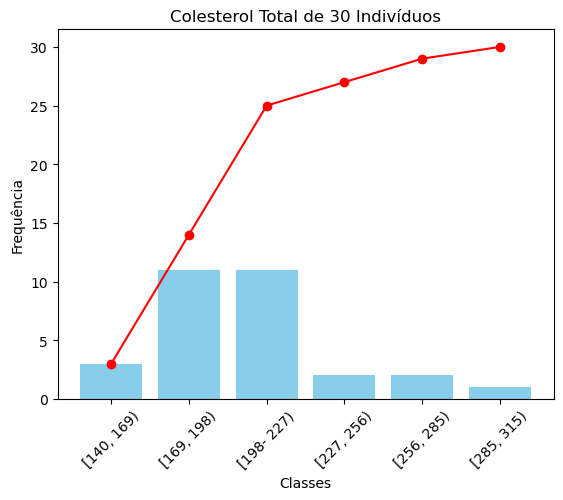

In [2]:
# Definindo os dados
classes = ['[140, 169)', '[169, 198)', '[198- 227)', '[227, 256)', '[256, 285)', '[285, 315)']
frequencias = [3, 11, 11, 2, 2, 1]

# Calculando a frequência acumulada
frequencia_acumulada = np.cumsum(frequencias)

# Criando o histograma
plt.bar(classes, frequencias, color='skyblue')

# Adicionando a linha da frequência acumulada
plt.plot(classes, frequencia_acumulada, marker='o', color='red', linestyle='-')

# Adicionando rótulos e título
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.title('Colesterol Total de 30 Indivíduos')

# Exibindo o histograma
plt.xticks(rotation=45)
plt.show()


c. Calcule as frequências relativas, as frequências acumuladas absolutas e relativas e os pontos médios para todas as classes.

Classes | Frequência Absoluta | Frequência Abs. Acumulada | Ponto Médio
--|--|--|--
[140, 169)| 3 | 3 | $\frac{140 - (169 - 140)}{2} = 55,5$
[169, 198) | 11 | 14 | $\frac{169 - (198 - 169)}{2} = 70$
[198- 227) | 11 | 25 | $\frac{198 - (227 - 198)}{2} = 84,5$
[227, 256) | 2 | 27 | $\frac{227 - (256 - 227)}{2} = 99$
[256, 285) | 2 | 29 | $\frac{256 - (285 - 256)}{2} = 113,5$
[285, 315) | 1 | 30 | $\frac{285 - (315 - 285)}{2} = 127,5$
total | 30 |

d. Calcule a taxa de colesterol média.

> $\overline{X} = \frac{\sum_{i=1}^{N} X_{i}}{N}$

> $\overline{X} = \frac{140 + 160 + 168 + 180 + 180 + 180 + 180 + 184 + 185 + 190 + 190 + 192 + 192 + 196 + 200 + 200 + 200 + 205 + 205 + 208 + 214 + 214 + 220 + 220 + 225 + 230 + 240 + 260 + 280 + 315}{30}$

> $\overline{X} = 205,1$

e. Calcule a taxa de colesterol mediana.

> $M = \frac{200 + 200}{2} = 200$

f. Calcule a variância e o desvio padrão amostral.

* Média
  
> $\overline{X} = 204,5$

* Calculando o Desvio

> $205,1 - 140=65,1$

> $205,1 - 160=45,1$

> $205,1 - 168=37,1$

> $205,1 - 180=25,1 * 3=75,3$

> $205,1 - 184=21,1$

> $205,1 - 185=20,1$

> $205,1 - 190=15,1 * 2=30,2$

> $205,1 - 192=13,1 * 2=26,2$

> $205,1 - 196=9,1$

> $205,1 - 200=5,1 * 3=15,3$

> $205,1 - 205=0,1 * 2=0,2$

> $208 - 205,1=2,9$

> $214 - 205,1=8,9 * 2=17,8$

> $220 - 205,1=14,9 * 2=29,8$

> $225 - 205,1=19,9$

> $230 - 205,1=24,9$

> $240 - 205,1=34,9$

> $260 - 205,1=54,9$

> $280 - 205,1=74,9$

> $315 - 205,1=109,9$

* Variância

> $σ ^2 = \frac{(65,1)^2 + (45,1)^2 + (37,1)^2 + (75,3)^2 + (21,1)^2 + (20,1)^2 + (30,2)^2 + (26,2)^2 + (9,1)^2 + (15,3)^2 + (0,2)^2 + (2,9)^2 + (17,8)^2 + (29,8)^2 + (19,9)^2 + (24,9)^2 + (34,9)^2 + (54,9)^2 + (74,9)^2 + (109,9)^2}{30} \approx 1341,08$

* Desvio Padrão

> $DP = \sqrt{σ ^2}$

> $DP = \sqrt{1341,08} \approx 36,62$

# Questão 2 

2. Considere que os valores assumidos por um dado atributo numérico são listados no vetor x = {1, 3, 2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 3, 2, 0} .

a) Calcule o histograma de x (utilize o bom senso para definir o número de classes).

* Ordenando os Dados

> $X = \{0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3\}$

* Regra de Sturges

> $K = 1 + 3,3log(n)$

> $K = 1 + 3,3*1,32$

> $K = 1 + 4,35 $

> $K = 5,35 \approx 5$

* Amplitude do Conjunto de Dados

> $L = X_{max} - X_{min}$

> $L = 3 - 0$

> $L = 3$

* Amplitude de Classes

> $h = \frac{L}{K}$

> $h = \frac{3}{5}$

> $h = 0, 6 \approx 1$

* Ajuste das Classes

Limite Inferior | Limite Superior
----------------|---------------
0 | 1
1 | 2
2 | 3
3 | 4
4 | 5

> $5 - 3 = 2 ---> \text{Sobra 2}$

- Distribuíndo o Excesso

> $0 - 1 = -1$

> $3 + 1 = 4$

Classes | Frequência | Frequência Acumulada
--|--|--
-1- 0 | 5 | 5
0- 1 | 2 | 7
1- 2 | 7 | 14
2- 3 | 7 | 21
3- 4| 0 | 21
total | 21 |

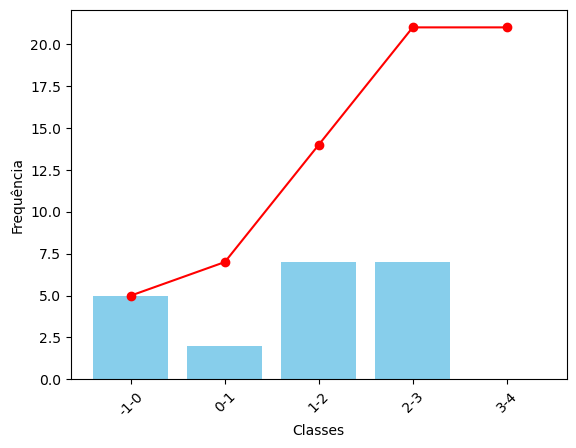

In [3]:
# Definindo os dados
classes = ['-1-0', '0-1', '1-2', '2-3', '3-4']
frequencias = [5, 2, 7, 7, 0]

# Calculando a frequência acumulada
frequencia_acumulada = np.cumsum(frequencias)

# Criando o histograma
plt.bar(classes, frequencias, color='skyblue')

# Adicionando a linha da frequência acumulada
plt.plot(classes, frequencia_acumulada, marker='o', color='red', linestyle='-')

# Adicionando rótulos e título
plt.xlabel('Classes')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.xticks(rotation=45)
plt.show()

b) Supondo que tais valores correspondem aos assumidos em um experimento por uma variável aleatória **X**, estime sua média $E[X] = µ$, $E[X^2]$, variância $σ ^2_{x}$, o desvio padrão $σ_{x}$ e o desvio médio absoluto.

* Média
  
> $E[X] = 0+0+0+0+0+1+1+2+2+2+2+2+2+2+3+3+3+3+3+3+3 = \frac{37}{21} \approx 1,76$

* Desvio
  
> $1,76 - 0 = 1,76 * 5=8,8$

> $1,76 - 1 = 0,76 * 2=1,52$

> $2 - 1,76 = 0,24 * 7=1,68$

> $3 - 1,76 = 1,24 * 7 =8,68$

* Variância
  
> $σ ^2_{x} = \frac{(8,8)^2 + (1,52)^2 + (1,68)^2 + (8,68)^2}{21} \approx 157,91$

> $σ ^2_{x} = \frac{157,91}{21} \approx 7,51$

* Desvio Padrão

> $DP = \sqrt{7,51}$

> $DP \approx 2,74$

* Desvio Médio

> $DM = \frac{8,8 + 1,52 + 1,68 + 8,68}{21} = 20.68$

> $DM = \frac{20.68}{21} \approx 0.98$


c) **X** é uma variável aleatórioa ou contínua?

**X** É uma variável contínua

# Questão 3

## Variância com NumPy

In [4]:
df = pd.DataFrame(data=load_iris().data)

In [5]:
coluna_3 = df.iloc[:,2]

In [6]:
variancia_coluna_3 = np.var(coluna_3)
variancia_coluna_3

3.0955026666666665

## Variância no LibreCalc
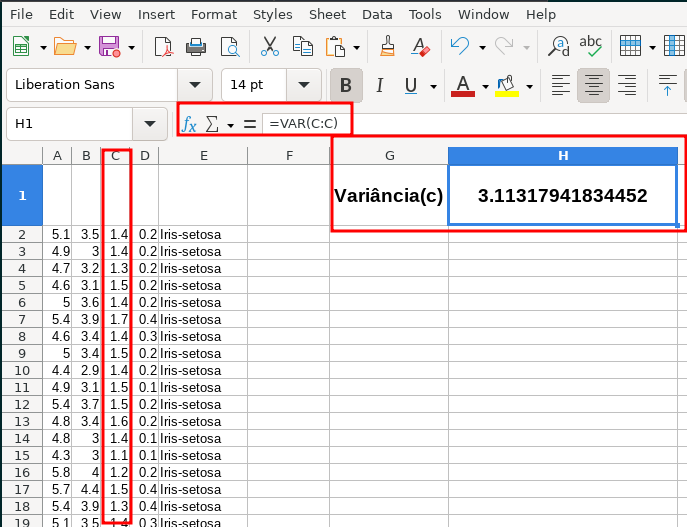

# Questão 4

In [7]:
def calcular_cv(dados):
    media = np.mean(dados)
    desvio_padrao = np.std(dados)
    return desvio_padrao / media

def plotar_taxa_erro(atributos, taxas_erro, nome_dataset):
    plt.plot(atributos, taxas_erro, marker='o')
    plt.xlabel('Número de Atributos')
    plt.ylabel('Taxa de Erro')
    plt.title(f'Taxa de Erro x Número de Atributos ({nome_dataset})')
    plt.grid(True)
    plt.show()


iris = load_iris()
diabetes = load_diabetes()

datasets = [(iris.data, iris.target, 'Iris'), (diabetes.data, diabetes.target, 'Diabetes')]

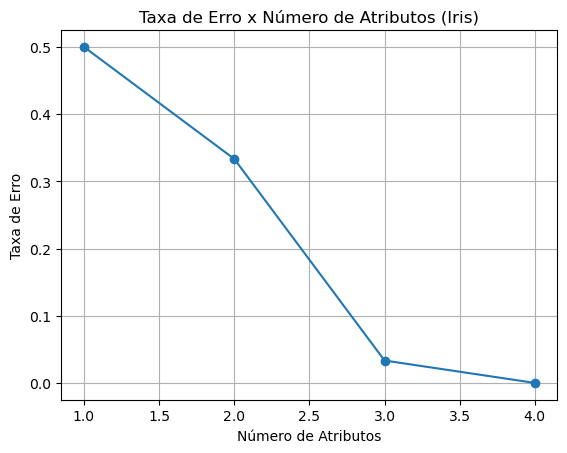

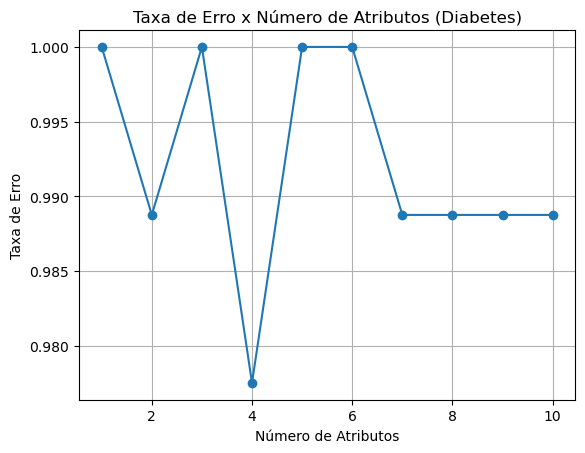

In [8]:
for dados, alvo, nome_dataset in datasets:
    atributos = []
    taxas_erro = []

    X_treino, X_teste, y_treino, y_teste = train_test_split(dados, alvo, test_size=0.2, random_state=42)

    num_atributos = X_treino.shape[1]
    for i in range(1, num_atributos + 1):
        cvs = [calcular_cv(X_treino[:, j]) for j in range(num_atributos)]
        indices_ordenados = np.argsort(cvs)
        atributos_selecionados = indices_ordenados[:i]

        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_treino[:, atributos_selecionados], y_treino)
        y_pred = knn.predict(X_teste[:, atributos_selecionados])
        taxa_erro = 1.0 - accuracy_score(y_teste, y_pred)

        atributos.append(i)
        taxas_erro.append(taxa_erro)

    plotar_taxa_erro(atributos, taxas_erro, nome_dataset)

# Questão 5

## DecisionStump

=== Run information ===

Scheme:       weka.classifiers.trees.DecisionStump 

Relation:     iris

Instances:    150

Attributes:   5

              sepallength
              
              sepalwidth
              
              petallength
              
              petalwidth
              
              class

Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

Decision Stump

Classifications

petallength <= 2.45 : Iris-setosa

petallength > 2.45 : Iris-versicolor

petallength is missing : Iris-setosa

Class distributions

petallength <= 2.45
Iris-setosa	Iris-versicolor	Iris-virginica	
1.0	0.0	0.0	

petallength > 2.45
Iris-setosa	Iris-versicolor	Iris-virginica	
0.0	0.5	0.5

petallength is missing
Iris-setosa	Iris-versicolor	Iris-virginica	
0.3333333333333333	0.3333333333333333	0.3333333333333333	


Time taken to build model: 0 seconds

=== Stratified cross-validation ===
=== Summary ===

<span style="color:green">**Correctly Classified Instances         100               66.6667 %**</span>

<span style="color:red">**Incorrectly Classified Instances        50               33.3333 %**</span>

Kappa statistic                          0.5   

Mean absolute error                      0.2222

Root mean squared error                  0.3333

Relative absolute error                 50      %

Root relative squared error             70.7107 %

Total Number of Instances              150     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     Iris-setosa
                 1.000    0.500    0.500      1.000    0.667      0.500    0.750     0.500     Iris-versicolor
                 0.000    0.000    ?          0.000    ?          ?        0.750     0.500     Iris-virginica
Weighted Avg.    0.667    0.167    ?          0.667    ?          ?        0.833     0.667     

=== Confusion Matrix ===

  a  b  c   <-- classified as
  
 50  0  0 |  a = Iris-setosa
 
  0 50  0 |  b = Iris-versicolor
  
  0 50  0 |  c = Iris-virginica

**O classificador J48 apresentou melhor consistência na classificação da Iris.**

=== Run information ===

Scheme:       weka.classifiers.trees.J48 -C 0.25 -M 2

Relation:     iris

Instances:    150

Attributes:   5

              sepallength
              
              sepalwidth
              
              petallength
              
              petalwidth
              
              class

Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

J48 pruned tree
------------------

petalwidth <= 0.6: Iris-setosa (50.0)
petalwidth > 0.6

|   petalwidth <= 1.7

|   |   petallength <= 4.9: Iris-versicolor (48.0/1.0)

|   |   petallength > 4.9

|   |   |   petalwidth <= 1.5: Iris-virginica (3.0)

|   |   |   petalwidth > 1.5: Iris-versicolor (3.0/1.0)

|   petalwidth > 1.7: Iris-virginica (46.0/1.0)

Number of Leaves  : 	5

Size of the tree : 	9


Time taken to build model: 0.01 seconds

=== Stratified cross-validation ===

=== Summary ===

<span style="color:green">**Correctly Classified Instances         144               96      %**</span>

<span style="color:red">**Incorrectly Classified Instances         6                4      %**</span>

Kappa statistic                          0.94  

Mean absolute error                      0.035 

Root mean squared error                  0.1586

Relative absolute error                  7.8705 %

Root relative squared error             33.6353 %

Total Number of Instances              150     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.980    0.000    1.000      0.980    0.990      0.985    0.990     0.987     Iris-setosa
                 0.940    0.030    0.940      0.940    0.940      0.910    0.952     0.880     Iris-versicolor
                 0.960    0.030    0.941      0.960    0.950      0.925    0.961     0.905     Iris-virginica
Weighted Avg.    0.960    0.020    0.960      0.960    0.960      0.940    0.968     0.924     

=== Confusion Matrix ===

  a  b  c   <-- classified as
  
 49  1  0 |  a = Iris-setosa
  
  0 47  3 |  b = Iris-versicolor
  
  0  2 48 |  c = Iris-virginica